# Visualize sample images

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'E:\\Datasets\\KDEF_and_AKDEF\\data\\train'

train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

for images, cls_true in train_generator:
    print(images.shape)
    break



Found 3918 images belonging to 7 classes.
(32, 224, 224, 3)


In [3]:
emotions = ['afraid', 'angry', 'disgusted', 'happy', 'neutral', 'sad', 'surprised']

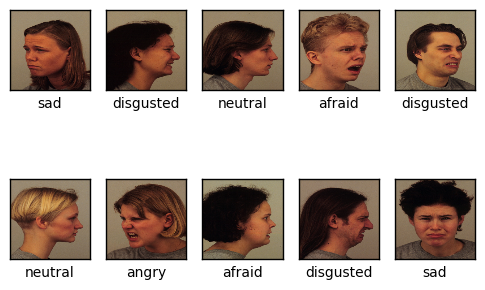

In [4]:
fig, axes = plt.subplots(2, 5)

for i, ax in enumerate(axes.flat):
        # Plot image.
    ax.imshow(images[i], cmap='binary')

    # Show true and predicted classes.

    xlabel = emotions[np.argmax(cls_true[i])]


    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])

# Ensure the plot is shown correctly with multiple plots
# in a single Notebook cell.
plt.show()

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/media/shuvendu/Projects/Datasets/KDEF_and_AKDEF/data/train'
test_dir ='/media/shuvendu/Projects/Datasets/KDEF_and_AKDEF/data/test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

Found 3918 images belonging to 7 classes.
Found 980 images belonging to 7 classes.


## Try using pretrined model

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 27,563,847
Trainable params: 27,563,847
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=10, 
                              validation_data=validation_generator, 
                              validation_steps=30)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/10
125/125 [==============================] - 98s - loss: 0.7391 - categorical_accuracy: 0.7165 - val_loss: 0.7383 - val_categorical_accuracy: 0.7110
Epoch 2/10
125/125 [==============================] - 97s - loss: 0.5080 - categorical_accuracy: 0.8099 - val_loss: 0.5878 - val_categorical_accuracy: 0.7869
Epoch 3/10
125/125 [==============================] - 98s - loss: 0.4125 - categorical_accuracy: 0.8489 - val_loss: 0.4989 - val_categorical_accuracy: 0.8154
Epoch 4/10
125/125 [==============================] - 99s - loss: 0.2947 - categorical_accuracy: 0.8958 - val_loss: 0.4137 - val_categorical_accuracy: 0.8502
Epoch 5/10
125/125 [==============================] - 98s - loss: 0.2172 - categorical_accuracy: 0.9299 - val_loss: 0.3401 - val_categorical_accuracy: 0.8745
Epoch 6/10
125/125 [==============================] - 101s - loss: 0.1651 - categorical_accuracy: 0.9444 - val_loss: 0.4673 - val_categor

In [9]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=30)

Epoch 1/30
125/125 [==============================] - 43s - loss: 0.0361 - categorical_accuracy: 0.9870 - val_loss: 0.4405 - val_categorical_accuracy: 0.8875
Epoch 2/30
125/125 [==============================] - 42s - loss: 0.0303 - categorical_accuracy: 0.9885 - val_loss: 0.4188 - val_categorical_accuracy: 0.8998
Epoch 3/30
125/125 [==============================] - 42s - loss: 0.0184 - categorical_accuracy: 0.9950 - val_loss: 0.3898 - val_categorical_accuracy: 0.8987
Epoch 4/30
125/125 [==============================] - 42s - loss: 0.0070 - categorical_accuracy: 0.9977 - val_loss: 0.4705 - val_categorical_accuracy: 0.9019
Epoch 5/30
125/125 [==============================] - 42s - loss: 0.0082 - categorical_accuracy: 0.9967 - val_loss: 0.4465 - val_categorical_accuracy: 0.9124
Epoch 6/30
125/125 [==============================] - 42s - loss: 0.0069 - categorical_accuracy: 0.9977 - val_loss: 0.4280 - val_categorical_accuracy: 0.9146
Epoch 7/30
125/125 [==============================] 

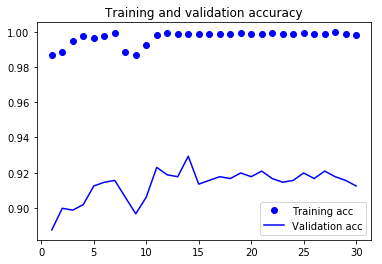

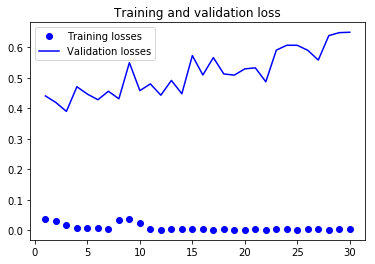

In [11]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model.save('fully_trained_model.h5')

# Building accuracy matrix

In [1]:
from keras.models import load_model
from os import listdir
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

labels = {
    0 : "AF",
    1 : "AN",
    2 : "DI",
    3 : "HA",
    4 : "NE",
    5 : "SA",
    6 : "SU"
}

model = load_model('fully_trained_model.h5')


Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
test_dir ="D:\\Research\\data\\KDEF\\test"


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

Found 247 images belonging to 7 classes.


In [3]:
model.evaluate_generator(test_generator, 8)

[0.3302875406105026, 0.9190283420114864]

In [5]:
model.metrics_names

['loss', 'categorical_accuracy']

In [4]:
result = [[0 for _ in range(7)] for _ in range(7)]

for _ in range(30):
    data, labels = test_generator.next()
    labels = np.argmax(labels, axis=1)
    
    predictions = model.predict(data)
    predictions = np.argmax(predictions, axis=1)
    
    for i in range(len(predictions)):
        result[labels[i]][predictions[i]] += 1

In [5]:
result

[[113, 0, 6, 0, 4, 8, 16],
 [4, 146, 4, 0, 0, 0, 0],
 [0, 7, 137, 0, 0, 4, 0],
 [0, 0, 0, 136, 0, 0, 0],
 [0, 0, 0, 0, 80, 5, 0],
 [0, 8, 0, 0, 4, 104, 0],
 [8, 0, 0, 0, 0, 0, 130]]

# Analyzing effect of noise

In [69]:
from keras.preprocessing.image import ImageDataGenerator
test_dir ="E:\\Datasets\\KDEF_and_AKDEF\\data\\test"


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

model.evaluate_generator(test_generator, 30)

Found 980 images belonging to 7 classes.


[0.60153162338150046, 0.91979166666666667]

[109, 134, 125, 135, 132, 118, 128]
[135, 138, 140, 137, 136, 136, 138]
[80.74074074074075, 97.10144927536231, 89.28571428571429, 98.54014598540147, 97.05882352941177, 86.76470588235294, 92.7536231884058]


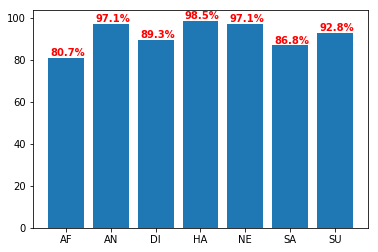

In [70]:
result = [0 for _ in range(7)]
total = [0 for _ in range(7)]


for _ in range(30):
    data, labels = test_generator.next()
    labels = np.argmax(labels, axis=1)
    
    predictions = model.predict(data)
    predictions = np.argmax(predictions, axis=1)
    
    for i in range(len(predictions)):
        if labels[i]==predictions[i]:
            result[labels[i]] += 1
        total[labels[i]] += 1

print(result)
print(total)
for i in range(7):
    result[i] = result[i] / total[i] * 100
print(result)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(7)


fig, ax = plt.subplots()

plt.bar(x, result)
plt.xticks(x, ("AF","AN","DI","HA","NE", "SA","SU"))

for i, v in enumerate(result):
    ax.text(i-.35, v+1, "{0:.1f}".format(v)+'%', color='red', fontweight='bold')

plt.show()

## Salt and peper

Found 980 images belonging to 7 classes.
[0.86717170329793591, 0.88437500000000002]
[106, 137, 114, 130, 122, 116, 124]
[136, 140, 138, 136, 136, 136, 138]
[77.94117647058823, 97.85714285714285, 82.6086956521739, 95.58823529411765, 89.70588235294117, 85.29411764705883, 89.85507246376811]


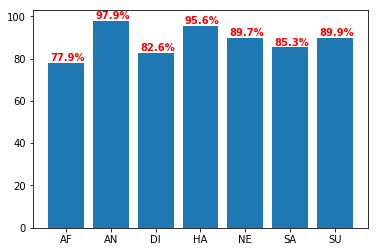

In [66]:
from keras.preprocessing.image import ImageDataGenerator
test_dir ="E:\\Datasets\\KDEF_and_AKDEF\\data\\s&p"


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

print(model.evaluate_generator(test_generator, 30))

result = [0 for _ in range(7)]
total = [0 for _ in range(7)]


for _ in range(30):
    data, labels = test_generator.next()
    labels = np.argmax(labels, axis=1)
    
    predictions = model.predict(data)
    predictions = np.argmax(predictions, axis=1)
    
    for i in range(len(predictions)):
        if labels[i]==predictions[i]:
            result[labels[i]] += 1
        total[labels[i]] += 1

print(result)
print(total)
for i in range(7):
    result[i] = result[i] / total[i] * 100
print(result)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(7)


fig, ax = plt.subplots()

plt.bar(x, result)
plt.xticks(x, ("AF","AN","DI","HA","NE", "SA","SU"))

for i, v in enumerate(result):
    ax.text(i-.35, v+1, "{0:.1f}".format(v)+'%', color='red', fontweight='bold')

plt.show()

## Gauss

Found 980 images belonging to 7 classes.
[0.63499110483874877, 0.91666666666666663]
[112, 135, 121, 135, 133, 118, 127]
[138, 139, 135, 137, 136, 137, 138]
[81.15942028985508, 97.12230215827337, 89.62962962962962, 98.54014598540147, 97.79411764705883, 86.13138686131386, 92.02898550724638]


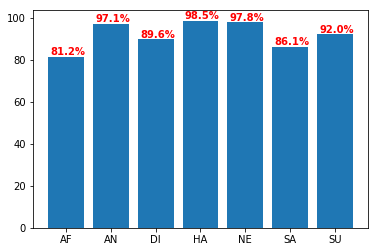

In [67]:
from keras.preprocessing.image import ImageDataGenerator
test_dir ="E:\\Datasets\\KDEF_and_AKDEF\\data\\gauss"


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

print(model.evaluate_generator(test_generator, 30))

result = [0 for _ in range(7)]
total = [0 for _ in range(7)]


for _ in range(30):
    data, labels = test_generator.next()
    labels = np.argmax(labels, axis=1)
    
    predictions = model.predict(data)
    predictions = np.argmax(predictions, axis=1)
    
    for i in range(len(predictions)):
        if labels[i]==predictions[i]:
            result[labels[i]] += 1
        total[labels[i]] += 1

print(result)
print(total)
for i in range(7):
    result[i] = result[i] / total[i] * 100
print(result)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(7)


fig, ax = plt.subplots()

plt.bar(x, result)
plt.xticks(x, ("AF","AN","DI","HA","NE", "SA","SU"))

for i, v in enumerate(result):
    ax.text(i-.35, v+1, "{0:.1f}".format(v)+'%', color='red', fontweight='bold')

plt.show()

## speckle

Found 980 images belonging to 7 classes.
[5.9852940082550052, 0.23229166666666667]
[9, 98, 57, 5, 5, 52, 0]
[134, 134, 139, 137, 138, 140, 138]
[6.7164179104477615, 73.13432835820896, 41.007194244604314, 3.64963503649635, 3.6231884057971016, 37.142857142857146, 0.0]


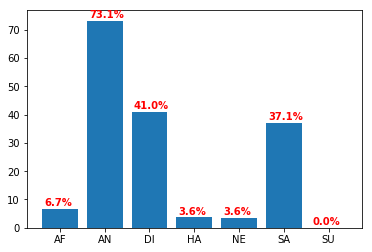

In [68]:
from keras.preprocessing.image import ImageDataGenerator
test_dir ="E:\\Datasets\\KDEF_and_AKDEF\\data\\speckle"


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

print(model.evaluate_generator(test_generator, 30))

result = [0 for _ in range(7)]
total = [0 for _ in range(7)]


for _ in range(30):
    data, labels = test_generator.next()
    labels = np.argmax(labels, axis=1)
    
    predictions = model.predict(data)
    predictions = np.argmax(predictions, axis=1)
    
    for i in range(len(predictions)):
        if labels[i]==predictions[i]:
            result[labels[i]] += 1
        total[labels[i]] += 1

print(result)
print(total)
for i in range(7):
    result[i] = result[i] / total[i] * 100
print(result)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(7)


fig, ax = plt.subplots()

plt.bar(x, result)
plt.xticks(x, ("AF","AN","DI","HA","NE", "SA","SU"))

for i, v in enumerate(result):
    ax.text(i-.35, v+1, "{0:.1f}".format(v)+'%', color='red', fontweight='bold')

plt.show()